### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/mimic/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.disease_label = df.disease_label.astype(str)
df.head()

,path,race_label,sex_label,disease_label,subject_id,study_id,split,file_path,image_embedding_0,image_embedding_1,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,p19/p19702416/s51321189/d85c9f15-f0f84927-761f...,0,0,3,19702416,51321189,train,datasets/mimic/files/p19/p19702416/s51321189.txt,0.017584,-0.003019,...,-0.052364,-0.018894,0.101141,0.003454,-0.030474,0.013750,-0.007859,0.061135,0.050736,-0.005674
1,p13/p13339704/s51292704/0024603b-12db30e2-ab32...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.025167,-0.008093,...,-0.045582,-0.014851,0.052466,-0.013415,-0.023199,0.001723,0.004433,0.036226,0.035885,-0.000904
2,p13/p13339704/s51292704/7953848d-2411f0df-859f...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.027844,-0.001912,...,-0.045582,-0.014851,0.052466,-0.013415,-0.023199,0.001723,0.004433,0.036226,0.035885,-0.000904
3,p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...,0,0,3,12668169,54048859,train,datasets/mimic/files/p12/p12668169/s54048859.txt,0.041953,0.002593,...,-0.031608,-0.018585,0.020580,0.012898,0.000496,0.035545,0.023832,-0.059201,0.019583,-0.003538
4,p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...,0,0,3,10309415,58144222,train,datasets/mimic/files/p10/p10309415/s58144222.txt,0.012712,0.006450,...,-0.038537,-0.009317,0.057783,-0.010010,-0.025244,0.002658,0.010754,0.027053,0.024629,0.007983


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'disease_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131972


STAGE:2024-02-26 02:17:32 25905:25905 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.5556, macro-f1: 0.4429
Epoch 1/50 - Training Time: 8.58 seconds | Inference Time: 1.84 seconds
Epoch 2/50 - Test Accuracy: 0.5493, macro-f1: 0.4385
Epoch 2/50 - Training Time: 8.07 seconds | Inference Time: 1.96 seconds
Epoch 3/50 - Test Accuracy: 0.5366, macro-f1: 0.4325
Epoch 3/50 - Training Time: 7.75 seconds | Inference Time: 1.87 seconds
Epoch 4/50 - Test Accuracy: 0.5493, macro-f1: 0.4426
Epoch 4/50 - Training Time: 7.34 seconds | Inference Time: 2.12 seconds
Epoch 5/50 - Test Accuracy: 0.5468, macro-f1: 0.4422
Epoch 5/50 - Training Time: 6.80 seconds | Inference Time: 1.92 seconds
Epoch 6/50 - Test Accuracy: 0.5483, macro-f1: 0.4428
Epoch 6/50 - Training Time: 7.28 seconds | Inference Time: 1.96 seconds
Epoch 7/50 - Test Accuracy: 0.5389, macro-f1: 0.4369
Epoch 7/50 - Training Time: 7.15 seconds | Inference Time: 1.93 seconds
Epoch 8/50 - Test Accuracy: 0.5658, macro-f1: 0.4528
Epoch 8/50 - Training Time: 7.87 seconds | Inference Time: 2.10 seconds


STAGE:2024-02-26 02:27:10 25905:25905 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-26 02:27:14 25905:25905 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch        10.19%       46.512s        51.73%      236.155s       2.806ms     -20.62 Gb     -20.82 Gb         84150  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        42.01%      191.808s        42.71%      194.973s       1.805ms      26.39 Gb      26.35 Gb        108000  
                              Optimizer.step#AdamW.step         6.92%       31.611s        19.60%       89.465s       1.063ms       1.01 Mb     -82.20

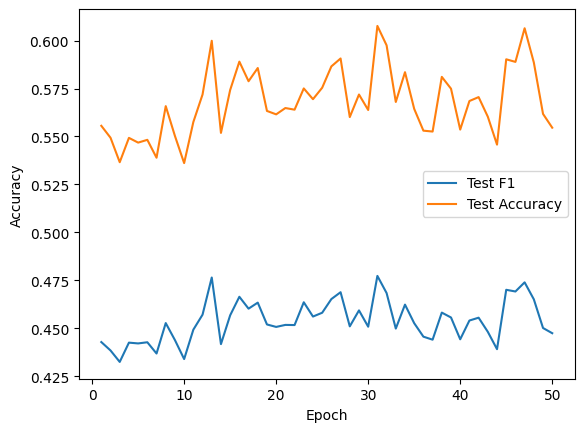

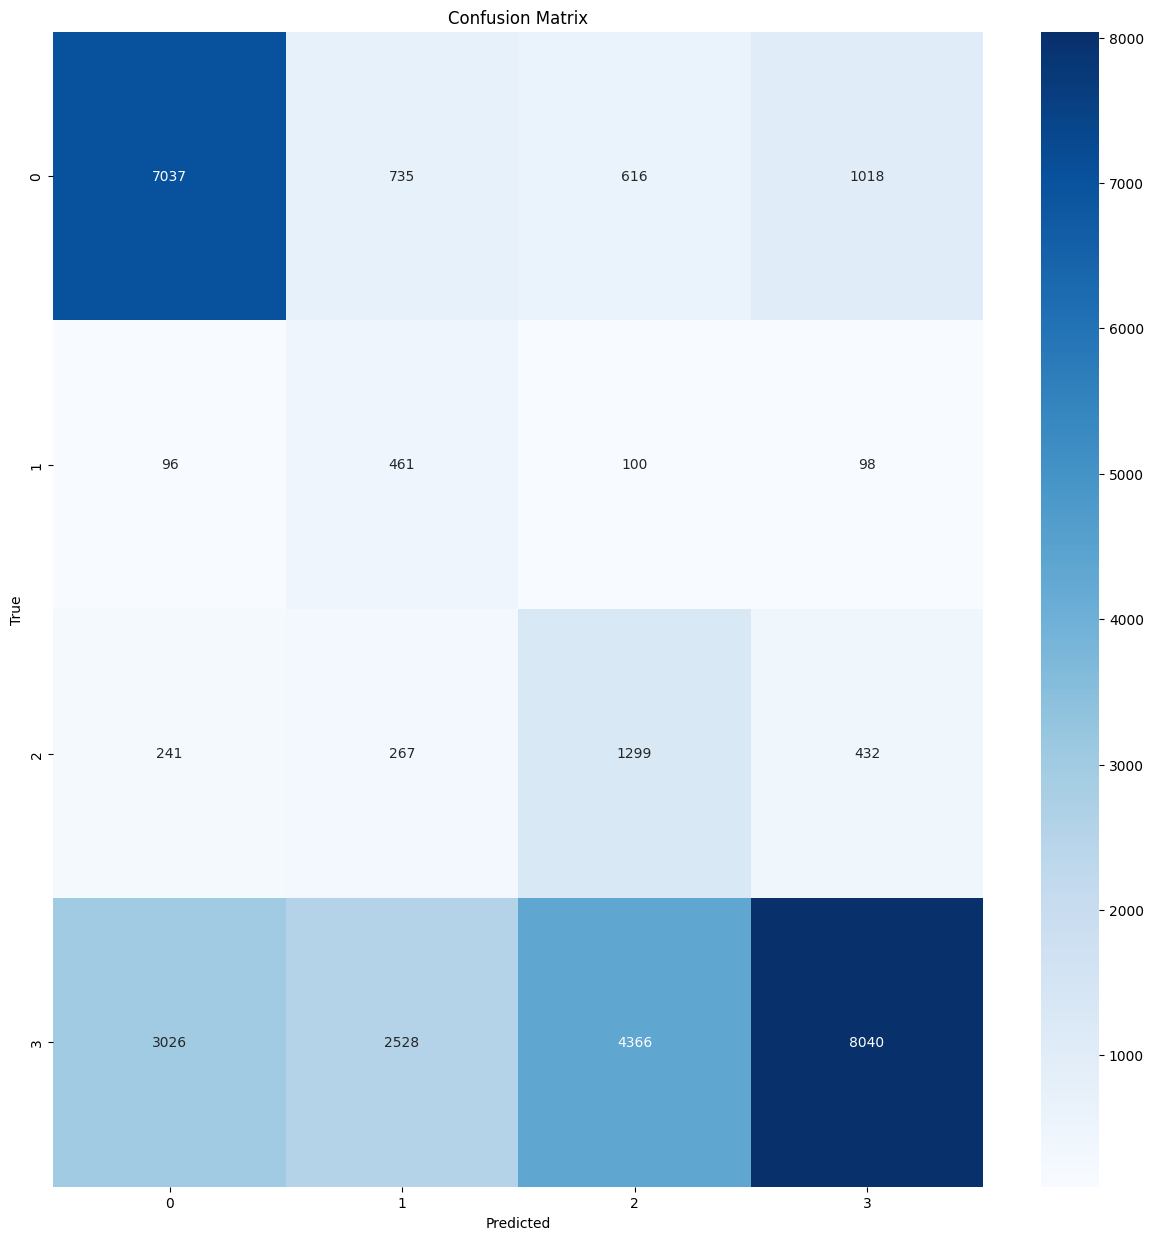

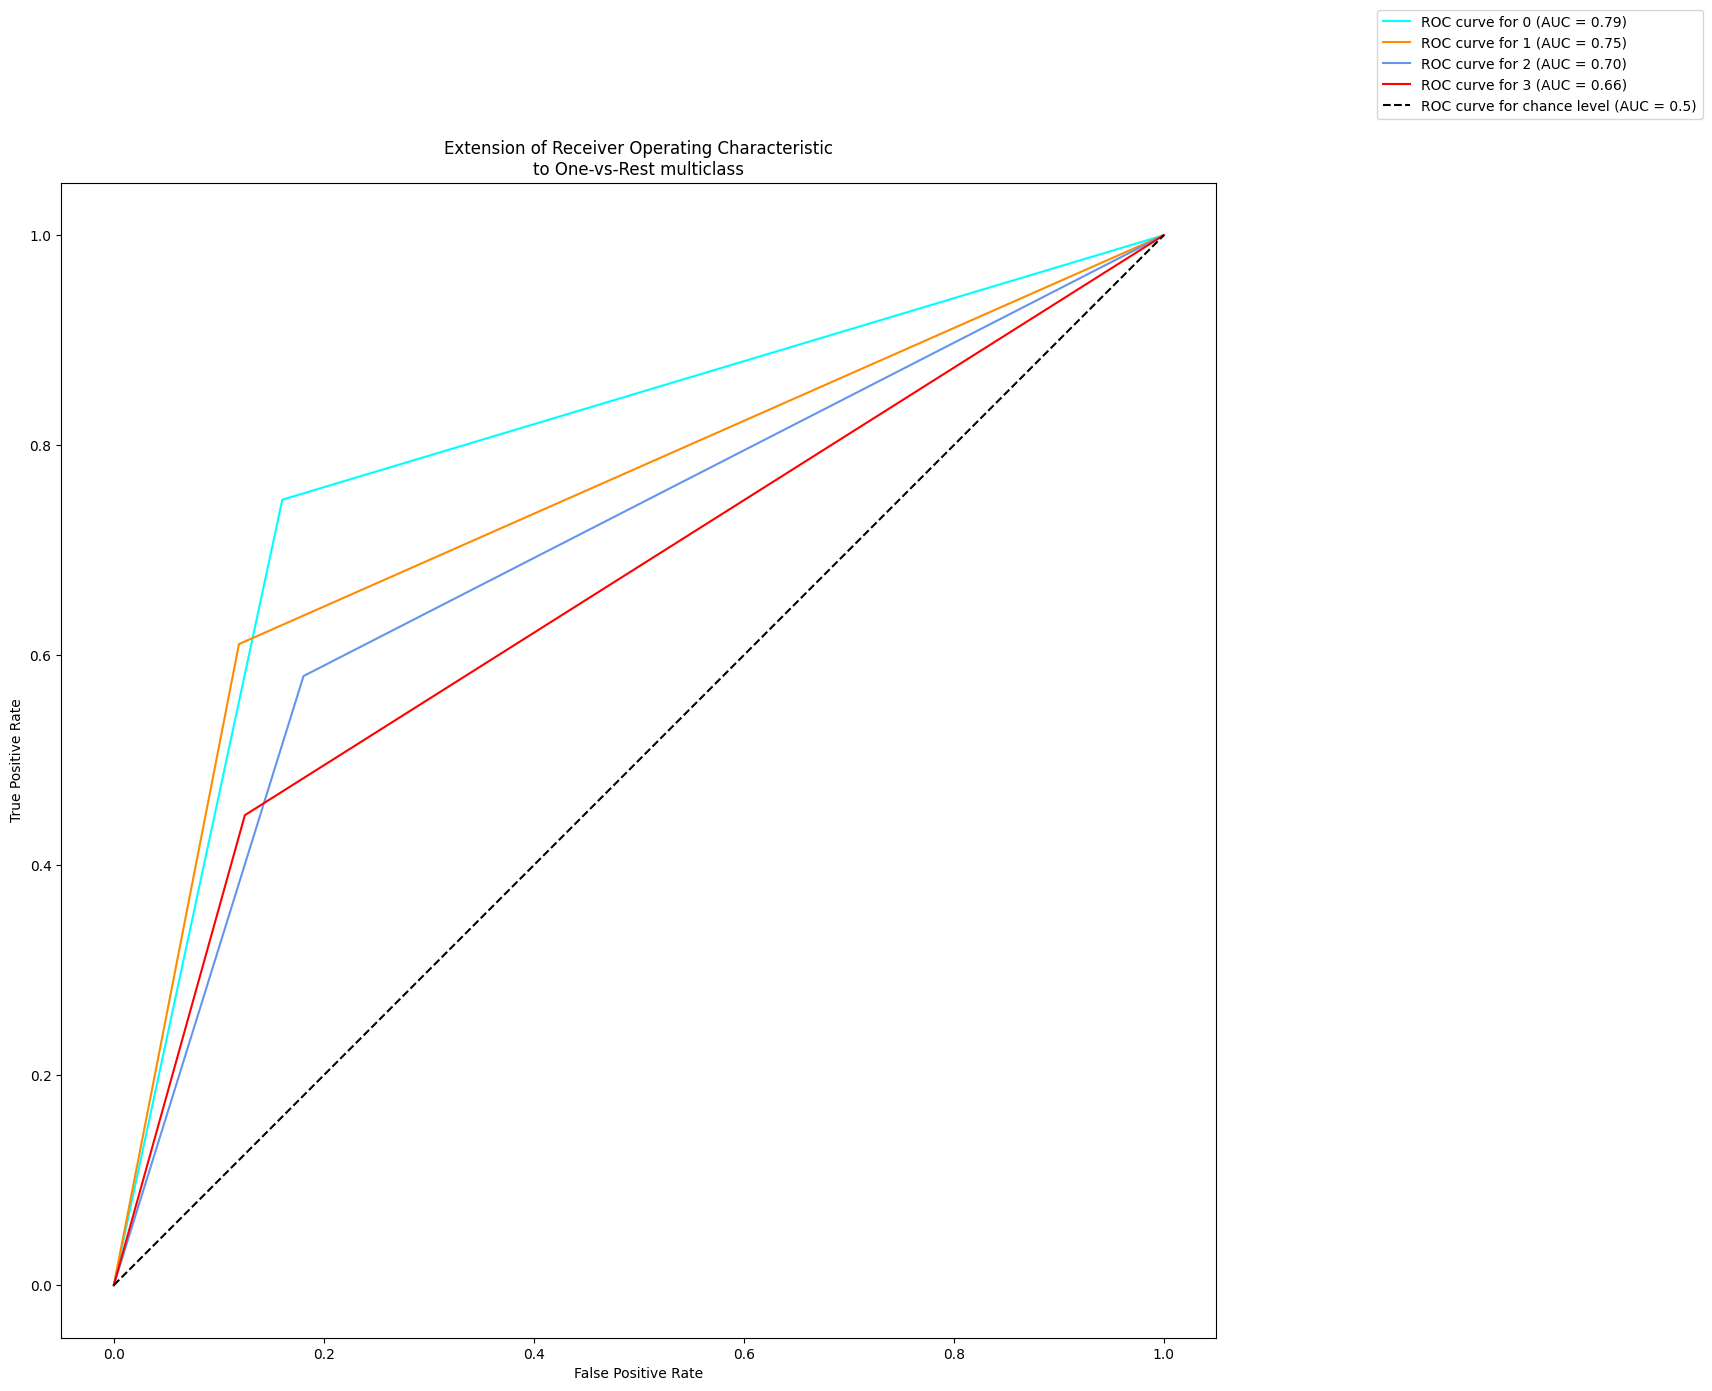

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      9406
           1       0.12      0.61      0.19       755
           2       0.20      0.58      0.30      2239
           3       0.84      0.45      0.58     17960

    accuracy                           0.55     30360
   macro avg       0.46      0.60      0.45     30360
weighted avg       0.72      0.55      0.59     30360



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)

In [ ]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66436


STAGE:2024-02-26 03:28:10 25905:25905 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.5565, macro-f1: 0.4379
Epoch 1/50 - Training Time: 17.52 seconds | Inference Time: 4.47 seconds
Epoch 2/50 - Test Accuracy: 0.5964, macro-f1: 0.4672
Epoch 2/50 - Training Time: 15.79 seconds | Inference Time: 4.64 seconds
Epoch 3/50 - Test Accuracy: 0.5467, macro-f1: 0.4394
Epoch 3/50 - Training Time: 13.33 seconds | Inference Time: 4.62 seconds
Epoch 4/50 - Test Accuracy: 0.5939, macro-f1: 0.4713
Epoch 4/50 - Training Time: 13.96 seconds | Inference Time: 4.42 seconds
Epoch 5/50 - Test Accuracy: 0.5496, macro-f1: 0.4427
Epoch 5/50 - Training Time: 13.16 seconds | Inference Time: 4.51 seconds
Epoch 6/50 - Test Accuracy: 0.5581, macro-f1: 0.4478
Epoch 6/50 - Training Time: 13.20 seconds | Inference Time: 4.40 seconds
Epoch 7/50 - Test Accuracy: 0.5656, macro-f1: 0.4520
Epoch 7/50 - Training Time: 13.04 seconds | Inference Time: 4.44 seconds
Epoch 8/50 - Test Accuracy: 0.5551, macro-f1: 0.4466
Epoch 8/50 - Training Time: 13.06 seconds | Inference Time: 4.39 

STAGE:2024-02-26 03:53:38 25905:25905 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-26 03:55:04 25905:25905 ActivityProfilerController.cpp:322] Completed Stage: Post Processing
